**Import Library**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

Load **Dataset**

In [28]:
dataset = pd.read_csv('milknew.csv')

**Summary Dataset**

In [29]:
dataset.shape

(1059, 8)

In [30]:
dataset.head(20)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
5,6.6,37,1,1,1,1,255,high
6,5.5,45,1,0,1,1,250,low
7,4.5,60,0,1,1,1,250,low
8,8.1,66,1,0,1,1,255,low
9,6.7,45,1,1,0,0,247,medium


In [34]:
dataset.groupby('Grade').size()

,0
Grade,
high,256
low,429
medium,374


In [35]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


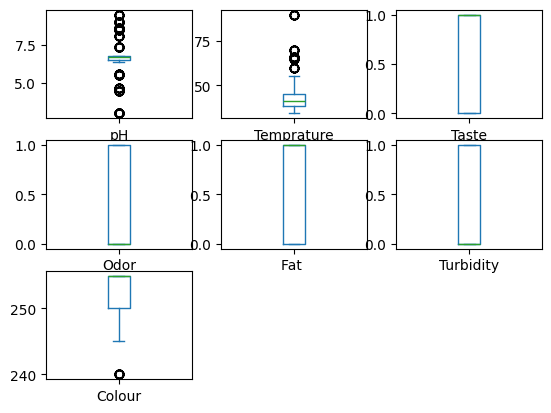

In [37]:
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

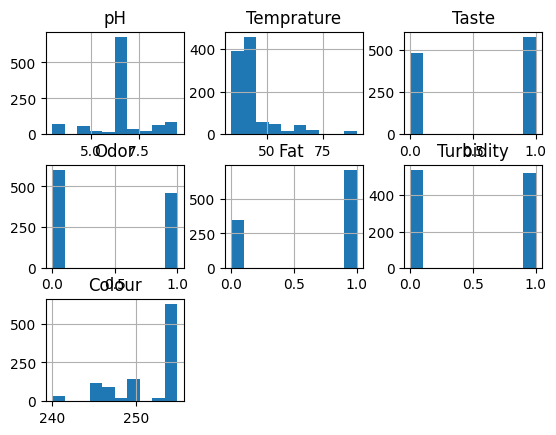

In [38]:
dataset.hist()
plt.show()

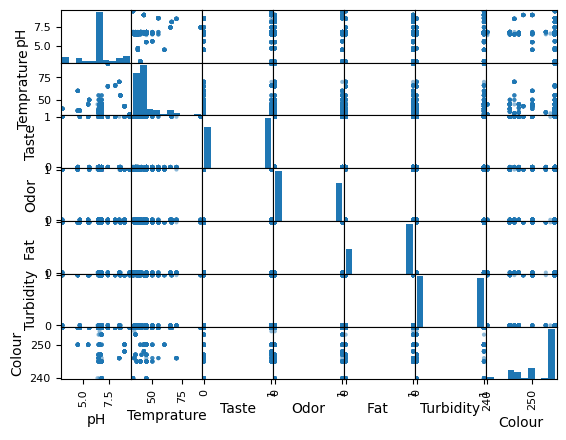

In [39]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset)
plt.show()

**Evaluasi Algoritma**

In [68]:
# Split data into features (X) and target (Y)
array = dataset.values
X = array[:, 0:7]  # Kolom fitur
Y = array[:, 7]    # Kolom target
validation_size = 0.20

# Encode target labels to numeric
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [71]:
# Spot Check Algorithms
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.992913 (0.005787)
NB: 0.913880 (0.030123)
SVM: 0.537227 (0.030019)


In [72]:
# Make predictions on validation dataset using SVM
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

# Print evaluation metrics
print("\nAccuracy Score:")
print(accuracy_score(Y_validation, predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(Y_validation, predictions))

print("\nClassification Report:")
print(classification_report(Y_validation, predictions))


Accuracy Score:
0.5094339622641509

Confusion Matrix:
[[ 0  0 48]
 [ 0 36 56]
 [ 0  0 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       1.00      0.39      0.56        92
           2       0.41      1.00      0.58        72

    accuracy                           0.51       212
   macro avg       0.47      0.46      0.38       212
weighted avg       0.57      0.51      0.44       212



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
